# Locally Weighted Regression

In [101]:
import numpy as np
import matplotlib.pyplot as plt

In [102]:
def kernel(point, X_mat, tau):
    m, n = np.shape(X_mat)
    weights = np.eye((m))
    for i in range(m):
        denominator = (-2 * tau * tau)
        diff = X_mat[i] - point
        weights[i, i] = np.exp(np.dot(diff, diff.T) / denominator) # item() --> extract scaler
    return weights

In [103]:
X = np.array([[1, 2, 3],
             [1, 2, 3],
             [1, 5, 2]])
y = np.array([[12], [13], [14]])
point = np.array([1, 5, 6])

weights = kernel(point, X, 0.5)
weights

array([[2.31952283e-16, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.31952283e-16, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.26641655e-14]])

In [104]:
def local_weight(X_mat, y_mat, point, tau):
    W = kernel(point, X_mat, tau)
    theta = np.linalg.pinv((X_mat.T @ (W @ X_mat))) @ (X_mat.T @ (W @ y_mat))
    return theta

# pinv --> Moore-Penrose pseudoinverse of a matrix.
# matrix inverse to any matrix, whether it is square or rectangular, singular, or not.

In [105]:
theta = local_weight(X, y, point, 0.5)
theta

array([[0.91984733],
       [1.46183206],
       [2.88549618]])

In [106]:
def local_weight_regression(X_mat, y_mat, tau):
    """
    - X_mat --> (m, n + 1)
    - y_mat --> (m, )
    - tau --> scaler

    - Return: theta --> (n + 1, )
    """
    m, n = np.shape(X_mat)
    preds = np.zeros(m)

    for i in range(m):
        theta = local_weight(X_mat, y_mat, X_mat[i], tau)
        preds[i] = np.dot(X_mat[i], theta).item()
        
    return preds

In [107]:
preds = local_weight_regression(X, y, 0.5)
preds

array([12.50000023, 12.50000023, 13.99999916])

## Boston dataset

In [108]:
import pandas as pd
data = pd.read_csv("Linear Regression/boston.csv")
data.drop("Unnamed: 0", axis=1, inplace=True)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [109]:
data.shape

(506, 14)

In [110]:
X = data.drop("Price", axis=1)
y = data["Price"]
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [111]:
X = np.array(X)
y = np.array(y)
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [112]:
m = X.shape[0]
all_ones = np.ones((m, 1))
X = np.hstack((all_ones, X))  # bias terms
X[:5]

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00,
        5.3800e-01, 6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00,
        2.9600e+02, 1.5300e+01, 3.9690e+02, 4.9800e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00,
        4.6900e-01, 6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00,
        2.4200e+02, 1.7800e+01, 3.9690e+02, 9.1400e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00,
        4.6900e-01, 7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00,
        2.4200e+02, 1.7800e+01, 3.9283e+02, 4.0300e+00],
       [1.0000e+00, 3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00,
        4.5800e-01, 6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00,
        2.2200e+02, 1.8700e+01, 3.9463e+02, 2.9400e+00],
       [1.0000e+00, 6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00,
        4.5800e-01, 7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00,
        2.2200e+02, 1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [113]:
predictions = local_weight_regression(X, y, 0.1)
print(y[:5])
print(predictions[:5])

[24.  21.6 34.7 33.4 36.2]
[24.  21.6 34.7 33.4 36.2]


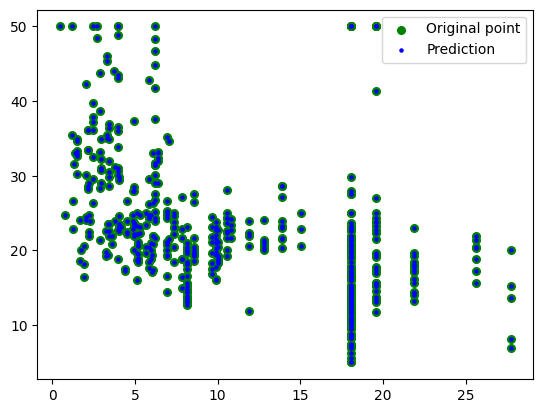

In [116]:
plt.scatter(x=X[:, 3], y=y, c='g', s=30, label="Original point")
plt.scatter(x=X[:, 3], y=predictions, c='b', s=5, label="Prediction")
plt.legend()
plt.show()

## Some Random Data
* Effect of tau

In [117]:
# generate dataset
X = np.linspace(-3, 3, num=1000)
Y = np.abs(X ** 3 - 1)

print(X.shape)
print(Y.shape)

(1000,)
(1000,)


In [118]:
X += np.random.normal(scale=.1, size=1000)
X = X.reshape(-1, 1)

In [119]:
def plot_lwr(tau):
    prediction = local_weight_regression(X, Y, tau)
    
    plt.scatter(X, Y, alpha=.7, s=10)
    plt.plot(X, prediction, lw=2, color='red')
    plt.show()

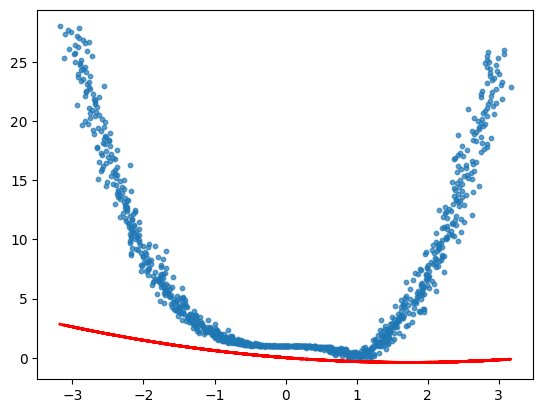

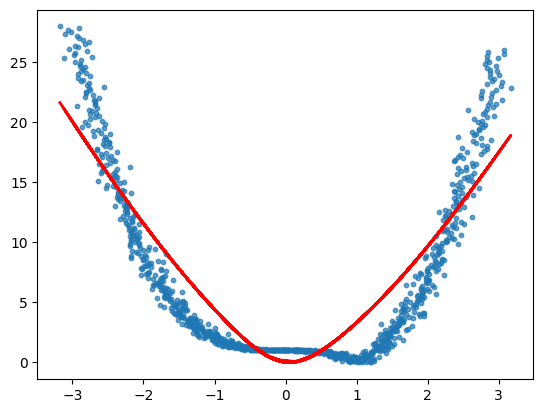

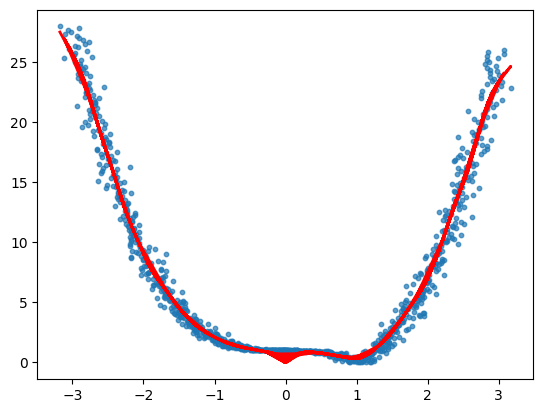

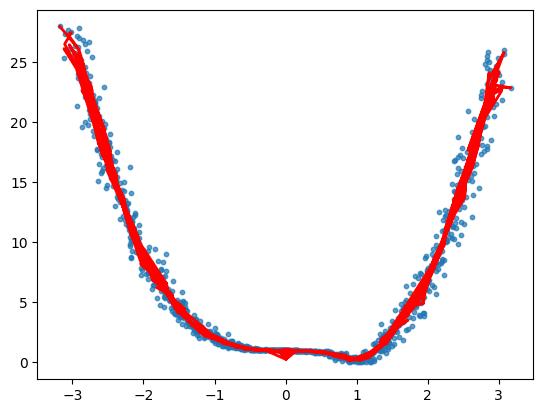

In [120]:
plot_lwr(10.)
plot_lwr(1.)
plot_lwr(0.1)
plot_lwr(0.01)

As we can notice from the above plot that with small values of bandwidth, the model fits better but sometimes it will lead to overfitting.